In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
  postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

engine.dispose()

#### Feature Exploration:

In [3]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [4]:
# drop all columns that contain null values (there are better ways to deal with nulls, but this is fastest for now)
houseprices.drop('id', axis=1, inplace=True)
cols = houseprices.columns
for col in cols:
    if (houseprices[col].isnull().sum() * 100)/len(houseprices) > 0:
        houseprices.drop(col, axis=1, inplace=True)
cols = houseprices.columns
print(len(houseprices.columns))

61


In [5]:
numeric_list = []
for col in cols:
    if (houseprices[col].dtypes == np.int64) or (houseprices[col].dtypes == np.float64):
        numeric_list.append(col)
print(numeric_list)

['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']


In [6]:
num_df = houseprices[numeric_list]
num_df.head()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


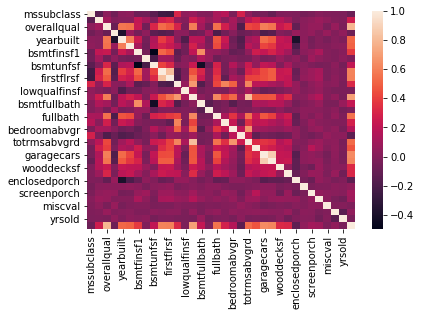

In [7]:
num_corr = num_df.corr()
sns.heatmap(num_corr)

In [8]:
# Select features that arent too closely correlated
features = list(num_corr.columns)
print('original feature length: {}'.format(len(features)))

# Loops to check correlation under diagonal (where columns correlate with themselves)
z = 1
for x in range(len(num_corr.columns)):
    col =  abs(num_corr.iloc[z:, x]).sort_values(ascending=False)
    for y in range(len(col)):
        if col[y] > .7:
            if col.index[y] in features:
                features.remove(col.index[y])
    z += 1    
if 'saleprice' not in features:
    features.append('saleprice')
print('new feature length: {}'.format(len(features)))

original feature length: 34
new feature length: 31


In [9]:
num_df = num_df[features]

In [10]:
num_df.head()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


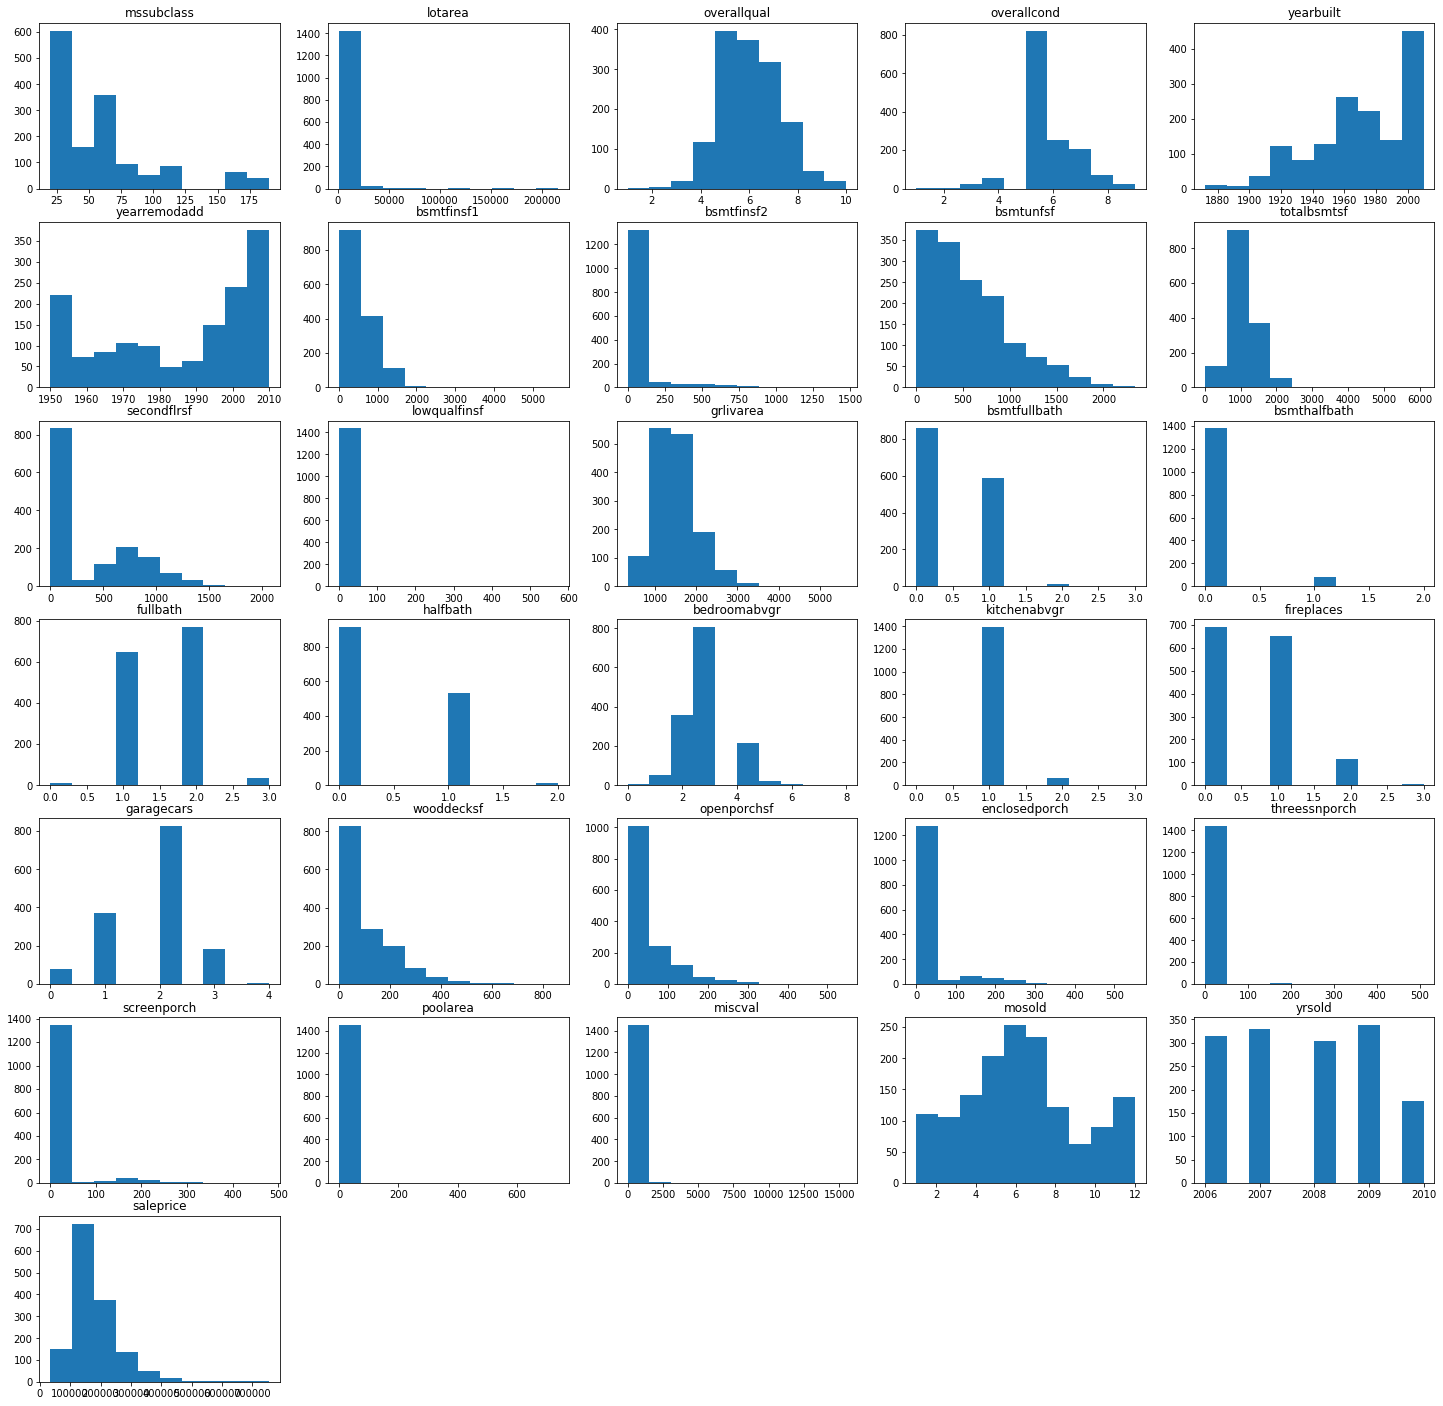

In [18]:
# Univariate analysis with histograms
fig = plt.subplots(figsize=(25,25))
for x in range(len(num_df.columns)):
    plt.subplot(7, 5, x+1)
    plt.hist(num_df.iloc[:, x])
    plt.title('{}'.format(num_df.iloc[:, x].name))

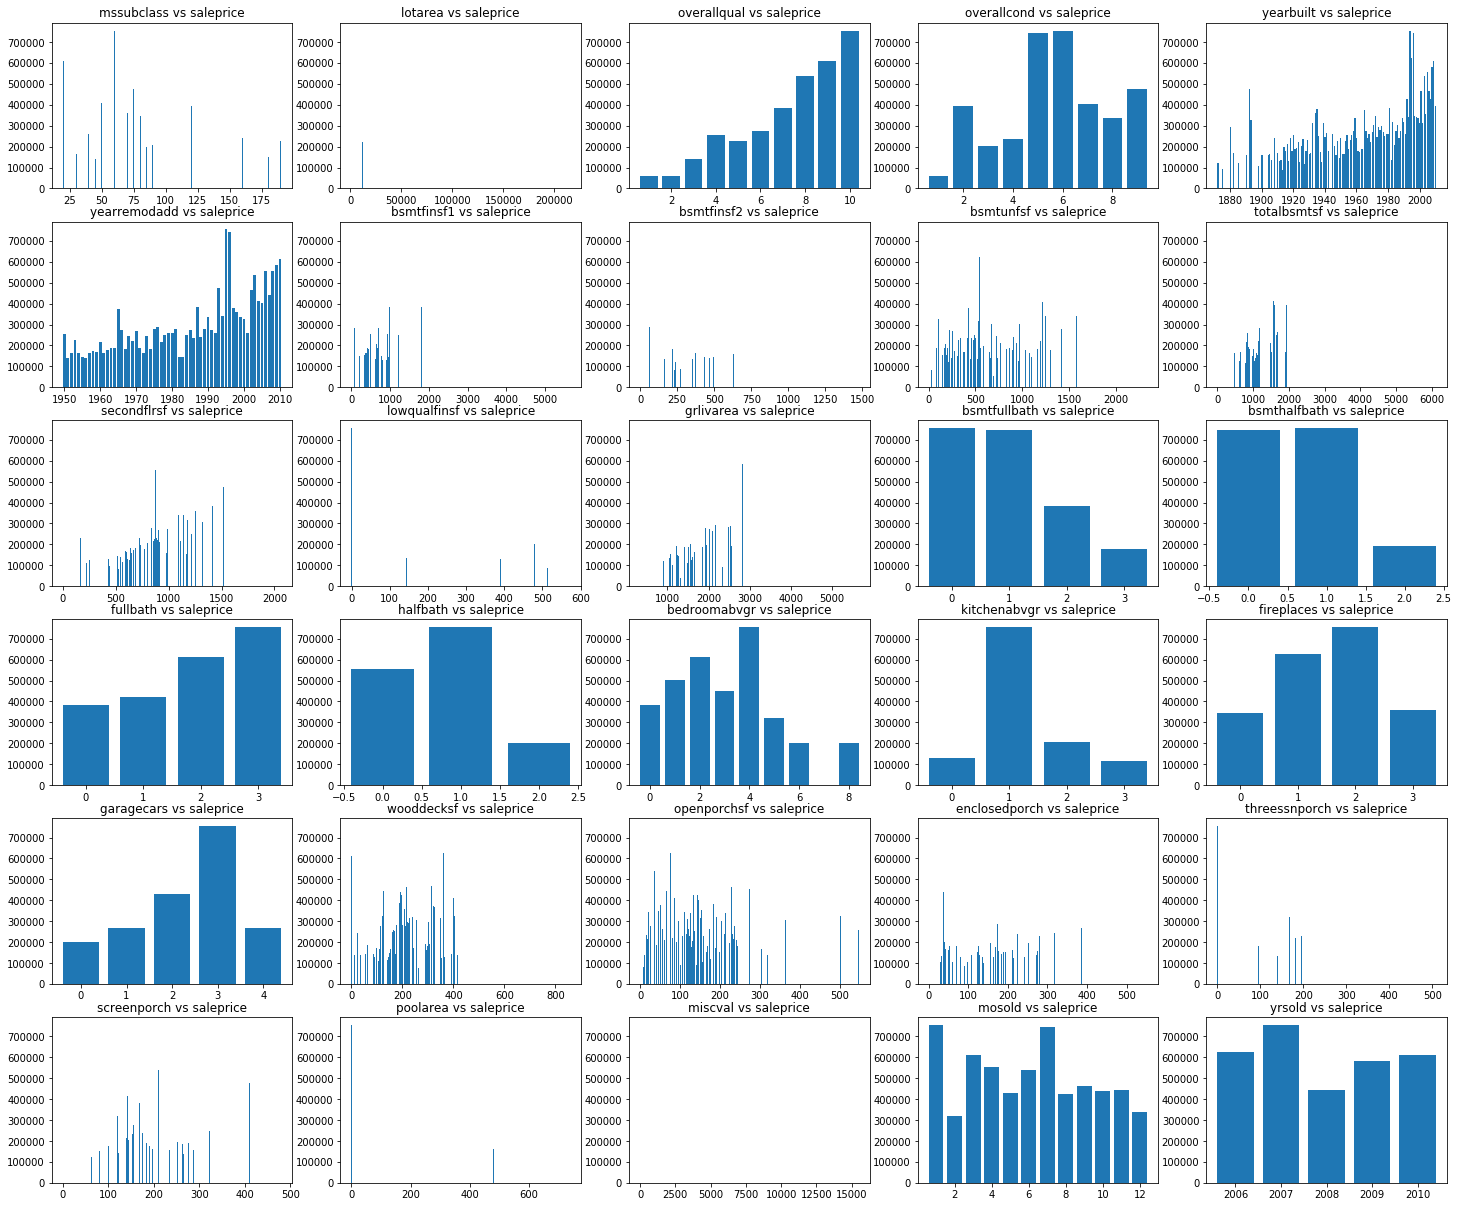

In [22]:
# multivariate analysis with bar graphs; numeric values
fig = plt.subplots(figsize=(25,25))

not_saleprice = num_df.drop('saleprice', axis=1)
for x in range(len(not_saleprice.columns)):
    plt.subplot(7, 5, x+1)
    plt.bar(not_saleprice.iloc[:, x], num_df['saleprice'])
    plt.title('{} vs saleprice'.format(num_df.iloc[:, x].name))

In [26]:
# Make list of non-numeric columns
nonum_list = []
for col in cols:
    if col not in num_corr.columns: # num_corr chosen because it contains all numeric value columns
        nonum_list.append(col)
        
print(nonum_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation', 'heating', 'heatingqc', 'centralair', 'kitchenqual', 'functional', 'paveddrive', 'saletype', 'salecondition']


In [27]:
nonum_df = houseprices[nonum_list]
nonum_df.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,extercond,foundation,heating,heatingqc,centralair,kitchenqual,functional,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


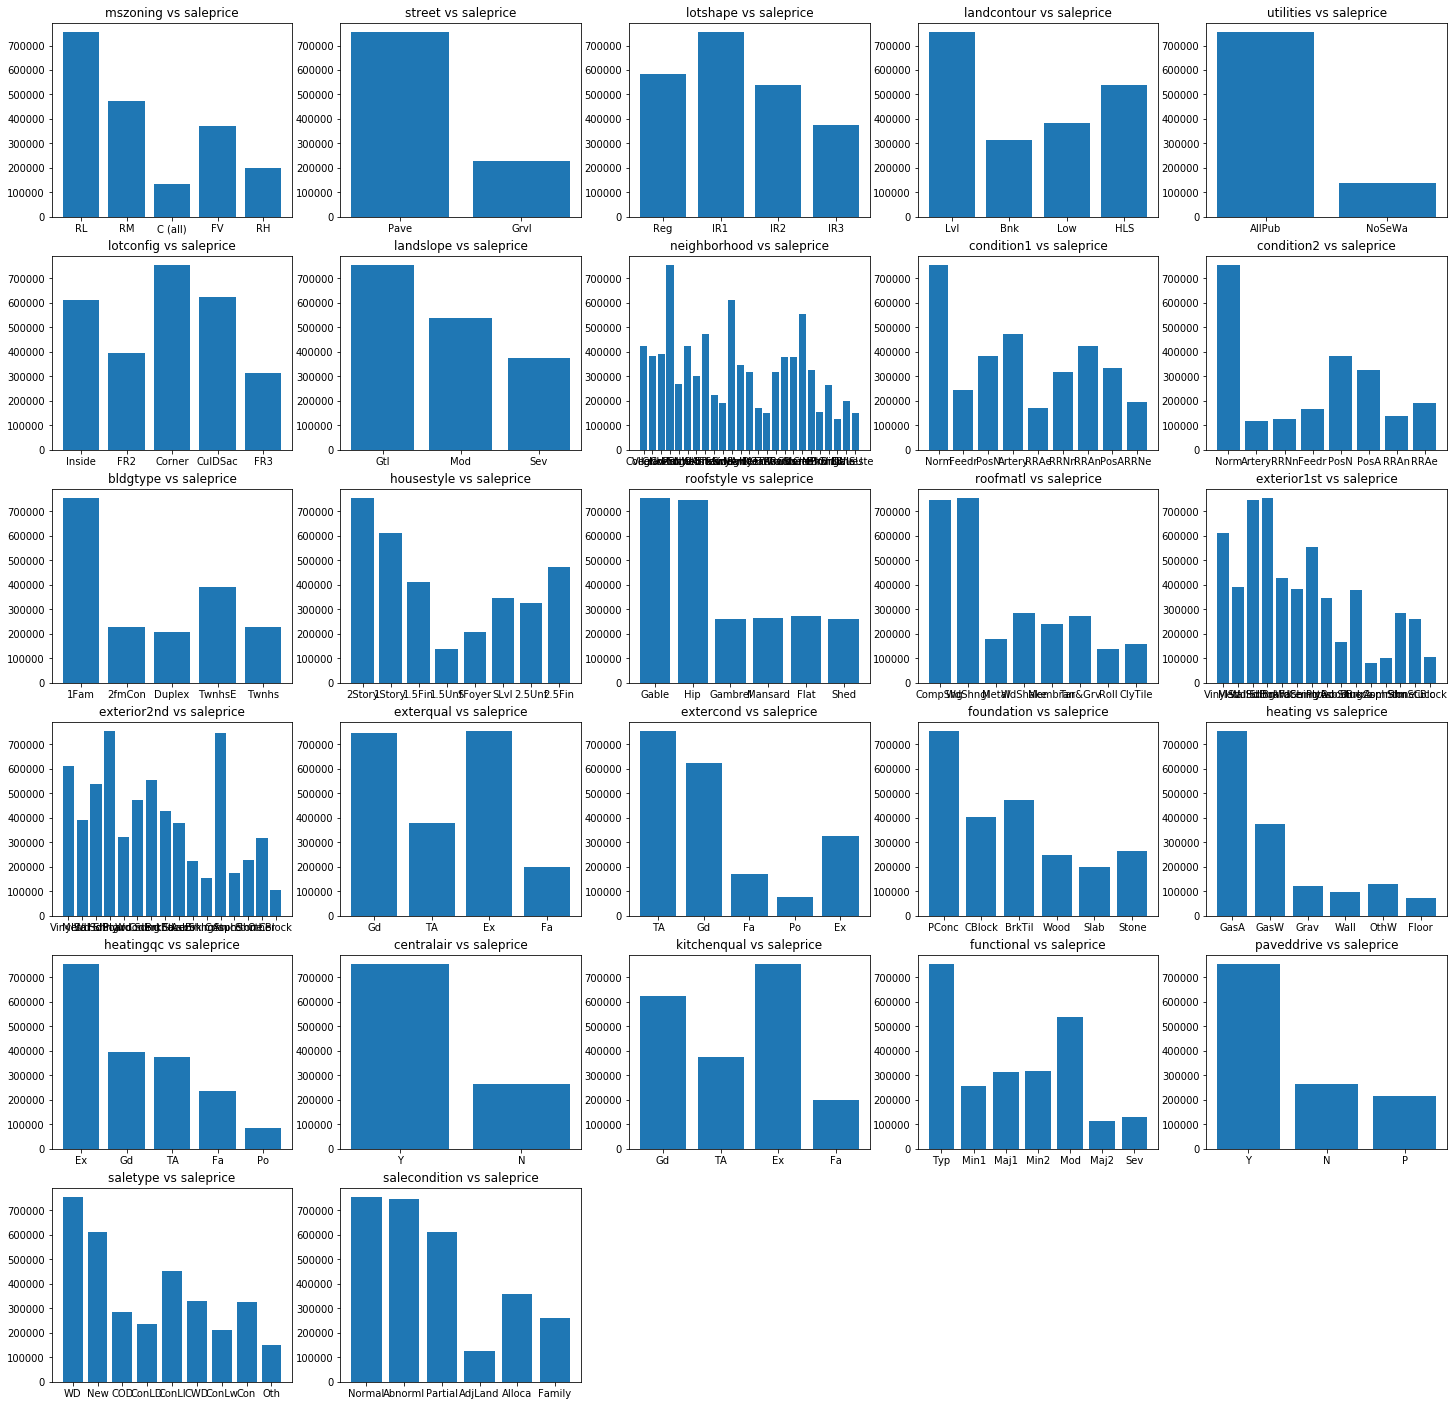

In [28]:
# multivariate analysis with bar graphs; non-numeric values
fig = plt.subplots(figsize=(25,25))
for x in range(len(nonum_df.columns)):
    plt.subplot(6, 5, x+1)
    plt.bar(nonum_df.iloc[:, x], num_df['saleprice'])
    plt.title('{} vs saleprice'.format(nonum_df.iloc[:, x].name))

##### Feature Selection:

In [ ]:
feats_list= []
for col in num_df.columns:
    if

for col in nonum_df.columns:
    if len(nonum_df[col].unique()) < 4:
        